### Statistical Terms and Metrics in Data Science

Various Statistical concepts are incorporated in Data Science. In this notebook I am going to cover some basic statistical terms, and talk about metrics used in Data Science for Regression and Classification tasks. 

<br></br>
#### Statistical terms

Let's look at some simple statistical terms in detail:

&nbsp;&nbsp;&nbsp;&nbsp;__Mean ($\bar{x}$):__ Averaging. Mean is a sum of all values divided by the number of values:

\begin{equation*}
\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}
\end{equation*}

&nbsp;&nbsp;&nbsp;&nbsp;__Variance ($\sigma^2$):__ Describes the spread of a distribution. For a set of values, the variance:

\begin{equation*}
\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}\big(x_i - \bar{x}\big)^2
\end{equation*}

&nbsp;&nbsp;&nbsp;&nbsp;__Standard Deviation ($\sigma$):__ Square root of variance, is in the units of the data it represents:

\begin{equation*}
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}\big(x_i - \bar{x}\big)^2}
\end{equation*}


<br></br>
_Note_: If the data is a subset of the entire population, the denominator (n) in the variance and standard deviation calculations becomes (n-1).

_Note 2_:  

* Predictor (X) is also called feature, or input variable
* Response (y) is also called target, output variable, or label

<br></br>
We are going to create an array using numpy, define methods for manual calculation of the above terms, and then implement built in numpy functions:

In [1]:
# Importing numpy library
import numpy as np

# Creating an array
x = np.array([3, 8, 5, 6, 2])

In [2]:
# Defining a method calculating the mean of a given array
def mean_calc(num):
    # Using max(len(num), 1) to avoid division by 0 for empty arrays.
    return float(sum(num)) / max(len(num), 1)

# Defining a method calculating the variance of a given array
def var_calc(num):
    x_bar = mean_calc(num)
    return sum(abs(num - x_bar)**2) / max(len(num), 1)

# Defining a method calculating the standard deviation of a given array
def std_calc(num):
    return var_calc(num)**(0.5)

# Printing calculated values
print('For a given array {}:'.format(x))
print('Mean: {0:15.3f}'.format(mean_calc(x)))
print('Variance: {0:11.3f}'.format(var_calc(x)))
print('Std. Deviation: {0:2.3f}'.format(std_calc(x)))

For a given array [3 8 5 6 2]:
Mean:           4.800
Variance:       4.560
Std. Deviation: 2.135


In [3]:
# Or with built-in numpy methods:
print('For a given array {}:'.format(x))
print('Mean: {0:15.3f}'.format(float(x.mean())))
print('Variance: {0:11.3f}'.format(x.var()))
print('Std. Deviation: {0:2.3f}'.format(x.std()))

For a given array [3 8 5 6 2]:
Mean:           4.800
Variance:       4.560
Std. Deviation: 2.135


### Metrics

There are different ways avaliable for measuring model performance, and they are well incorporated in __sckit-learn.metrics__.Before we get to the metrics, let's look at one more statistical term:

&nbsp;&nbsp;&nbsp;&nbsp;__Residuals:__


#### Regression Metrics

Let's first look at the metrics used to measure regression performance:

__R-squared (coefficient of determination)__ measures how response variables predicted by the model are fitting the actual values. For a linear model the values are in the range of 0 to 1. the R-squared value of 1 indicates that the regression line perfectly fits the data, there is no error using this model.

__R-squared__ is calculated by the below equation,

\begin{equation*}
R^2 = 1 - \frac {SS_{r}}{SS_{t}}
\end{equation*}

where in lineare regression __($SS_t$)__ is __Total Sum of Squares__ and __($SS_r$)__ is __Residual Sum of Squares__:


\begin{equation*}
SS_{t} = SS_{e} + SS_{r}
\end{equation*}

or, 

\begin{equation*}
\sum_{i=1}^{n}\big( y_i - \bar{y}\big)^2 = \sum_{i=1}^{n}\big(f(x_i) - \bar{y}\big)^2 + \sum_{i=1}^{n}\big(y_i - f(x_i)\big)^2
\end{equation*}

so, 

\begin{equation*}
R^2 = 1 - \frac {SS_{r}}{SS_{t}} = 1 - \frac {\sum_{i=1}^{n}\big(y_i - f(x_i)\big)^2}{\sum_{i=1}^{n}\big( y_i - \bar{y}\big)^2} = 1 - \frac {\sigma{^2}\big(y - \hat{y}\big)}{\sigma{^2}\big(y\big)}
\end{equation*}

<br></br>
Let's look at implementation of R-squared with scikit-learn

In [4]:
# Defining random seed for reproducibility
rseed = np.random.seed(7)

# Defining predictor (X) and response (y) variables. Reshaping X
X = np.arange(12, 22)
y = X * 10 + np.random.rand(len(X)) * 20

# Reshaping X array to a column vector
X = X[:, np.newaxis]

# Checking the shapes of X and y
print(X.shape, y.shape)

(10, 1) (10,)


In [5]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Creating linear regression object
model = LinearRegression()

# Fitting the data to the model and constructing the best fit line
model.fit(X, y)

# We can check the slope and intercept of the line
print('Slope:   {0:10.3f}\nIntercept:  {1:7.3f}'.format(model.coef_[0], model.intercept_))

Slope:        9.672
Intercept:   15.165


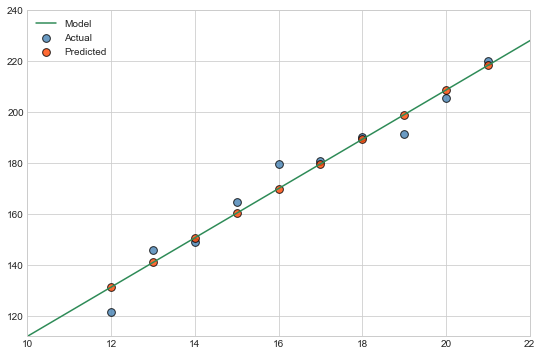

In [6]:
# Importing matplotlib for plotting, and seaborn for styling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

# Let's calculate the response variable predicted by the model.
# It can be done by: y_pred = X * model.coef_[0] + model.intercept_
# or by using model.predict function from scikit-learn
y_pred = model.predict(X)

# We also need to plot the model line
x_fit = np.linspace(10, 24)
y_fit = model.predict(x_fit[:, np.newaxis])

# Plotting the Actual values, Predicted values, and Model fit
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X, y, s=60, c='steelblue', alpha=0.8, edgecolors='k', label='Actual')
ax.scatter(X, y_pred, s=60, c='orangered', alpha=0.8, edgecolors='k', label='Predicted')
ax.plot(x_fit, y_fit, c='seagreen', label='Model')
ax.set_xlim(x_fit.min(), x_fit.max() - 2)
ax.set_ylim(y_fit.min(), 240)
plt.legend();

In [7]:
# Manually calculating the R-squared
r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2))
print('R-squared(manual):       {0:7.4f}'.format(r_squared))

# R-squared with variance equation
r_sq_var = 1 - (y - y_pred).var() / y.var()
print('R-squared(variance):     {0:7.4f}'.format(r_sq_var))

# Or using scikit-learns r2_score
from sklearn.metrics import r2_score
print('R-squared(scikit-learn): {0:7.4f}'.format(r2_score(y, y_pred)))

R-squared(manual):        0.9624
R-squared(variance):      0.9624
R-squared(scikit-learn):  0.9624
